<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/pd4_um_uw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.


In [172]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coef_true=[0]*100
for i in range(100):
  if i%5!=0:
    coef_true[i]=0
  elif i==0:
    coef_true[i]=1
  elif i%10==0:
    coef_true[i]=random.uniform(0,1)
  else:
    coef_true[i]=random.uniform(1,6)
coef_true=np.array(coef_true)



In [173]:
import sklearn.linear_model
from sklearn.linear_model import LassoCV, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def artif_data_sc():
  matr=[0]*1000
  for i in range(1000):
    matr[i]=[random.uniform(0,i+1) for j in range(100)]
    matr[i][0] = 1
  y_true = np.dot(matr, coef_true)
  y_true = y_true + np.random.normal(0, 2, len(y_true))
  df = pd.DataFrame(matr)
  df.columns = [f"x{i}" for i in range(df.shape[1])]
  df["y"] = y_true

  df_sc = StandardScaler().fit_transform(df)
  df_sc = pd.DataFrame(df_sc, columns=df.columns)

  return [df_sc.iloc[:,:-1], df_sc.iloc[:,-1]]


In [184]:

alphas=np.logspace(-3, 3, 40)
n_trails = 50
MSE_las=[[0 for i in range(n_trails)] for j in range(len(alphas))]
MSE_l2=[[0 for i in range(n_trails)] for j in range(len(alphas))]
#biases_las=[[0 for i in range(10)] for j in range(len(alphas))]
#biases_l2=[[0 for i in range(10)]  for j in range(len(alphas))]
variances_las=[[0 for i in range(n_trails)]  for j in range(len(alphas))]
variances_l2=[[0 for i in range(n_trails)]  for j in range(len(alphas))]

bias2_las=[0  for j in range(len(alphas))]
bias2_l2=[0   for j in range(len(alphas))]
var_las=[0   for j in range(len(alphas))]
var_l2=[0 for j in range(len(alphas))]
MSE_lasso=[0 for j in range(len(alphas))]
MSE_ridge=[0 for j in range(len(alphas))]

matr  = artif_data_sc()[0]
y_true = artif_data_sc()[1]
for j in range(len(alphas)):
  for i in range(n_trails):
    predict_las = []
    predict_l2 = []

    X_train, X_test, y_train, y_test = train_test_split(matr, y_true, test_size=0.2, random_state=42)

    las_mod=Lasso(alpha=alphas[j]).fit(X_train, y_train)
    y_las_pred= las_mod.predict(X_test)

    l2_mod=Ridge(alpha=alphas[j]).fit(X_train, y_train)
    y_l2_pred= l2_mod.predict(X_test)

    predict_las.append(y_las_pred)
    predict_l2.append(y_l2_pred)
    '''
    MSE_l2[j][i] = mean_squared_error(y_test, y_l2_pred)
    MSE_las[j][i] = mean_squared_error(y_test, y_las_pred)

    variances_las[j][i]=np.var(y_las_pred)
    variances_l2[j][i]=np.var(y_l2_pred)
    '''
  y_las_mean_pred = np.mean(predict_las)
  y_l2_mean_pred = np.mean(predict_l2)

  bias2_las[j] = np.mean((y_test - y_las_mean_pred) ** 2)
  bias2_l2[j] = np.mean((y_test - y_l2_mean_pred) ** 2)
  var_las[j] = np.mean((y_las_pred-y_las_mean_pred)**2)
  var_l2[j] = np.mean((y_l2_pred-y_l2_mean_pred)**2)

bias2_las[0:5]


[np.float64(0.9444458203308932),
 np.float64(0.9444538423115515),
 np.float64(0.9444583823909539),
 np.float64(0.9444570358100525),
 np.float64(0.9444385436587818)]

In [185]:

MSE_lasso=np.add(bias2_las,var_las)
MSE_ridge= np.add(bias2_l2, var_l2)
print(bias2_las)

[np.float64(0.9444458203308932), np.float64(0.9444538423115515), np.float64(0.9444583823909539), np.float64(0.9444570358100525), np.float64(0.9444385436587818), np.float64(0.9444182146085944), np.float64(0.9443855981130418), np.float64(0.9443476534980495), np.float64(0.9443217892557744), np.float64(0.9443028865384318), np.float64(0.944279951202892), np.float64(0.9442555951480343), np.float64(0.9442374089537025), np.float64(0.9442404559120072), np.float64(0.9442871864478929), np.float64(0.944428632444417), np.float64(0.9447136991801641), np.float64(0.9452217961578774), np.float64(0.9453471218591306), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float64(0.9452370641531822), np.float6

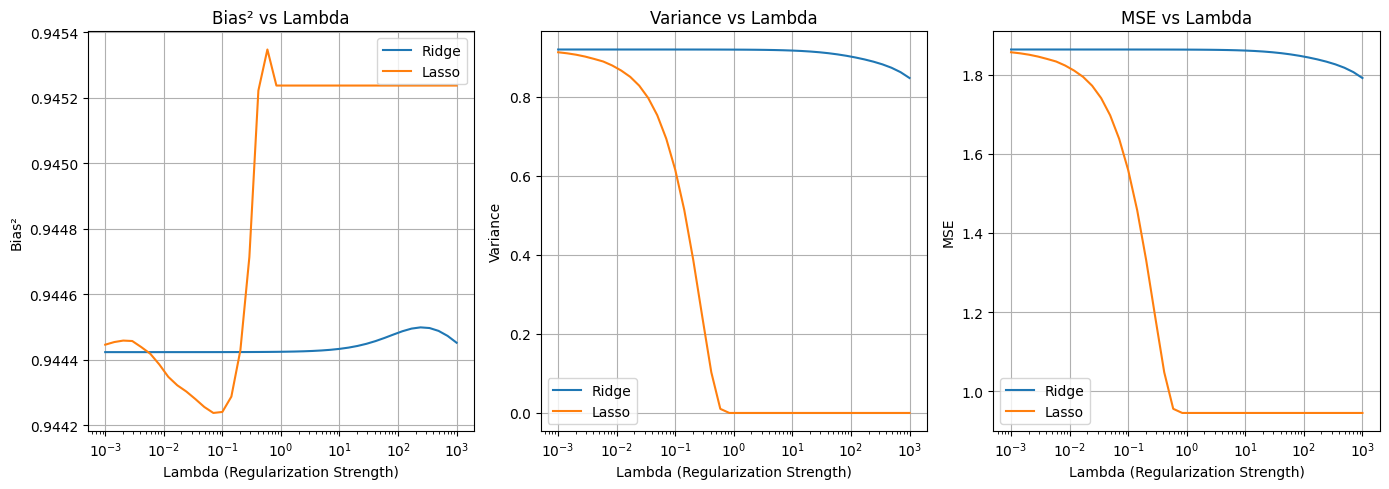

In [186]:
def plot_metric(metric_ridge, metric_lasso, title, ylabel):
    plt.plot(alphas, metric_ridge, label='Ridge')
    plt.plot(alphas, metric_lasso, label='Lasso')
    plt.xscale('log')
    plt.xlabel('Lambda (Regularization Strength)')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)


plt.rcParams["figure.figsize"] = (14,5)
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1, 3, 1)
plot_metric(bias2_l2, bias2_las, 'Bias² vs Lambda', 'Bias²')

plt.subplot(1, 3, 2)
plot_metric(var_l2, var_las, 'Variance vs Lambda', 'Variance')

plt.subplot(1, 3, 3)
plot_metric(MSE_ridge, MSE_lasso, 'MSE vs Lambda', 'MSE')

plt.tight_layout()
plt.show()

Explain MSE decomposition into bias and variance.

Twierdzenie mówi że MSE estymatora jest równe sumie bias^2 i wariancji. Oznacza to że chcąc minimalizować błąd średniokwadratowy chcemy brać pod uwagę oba te składniki. Stosując regularyzację zmniejszammy (lub nawet ściągamy do zera w przypadku lasso współczynniki do zera), co skutkuje zmniejszeniem wariancji modelu, jednak z reguły rośnie wtedy bias, gdyż predykcja nie uwzględnia wpływów zmiennych, które wcześniej miały istotniejszy wpływ na model.

Analyze how Ridge and Lasso differ in terms of their bias-variance trade-offs.

Lasso ma własność polegającą na ściąganiu do zera współczynników, w związku z czym wariancja na ogół szybciej maleje kosztem obciążenia dla modelu Lasso.